# IBM Advance Datascience Specialization - Capstone Project

#### Dataset Details: Real World Car Insurance Fraud Dataset - Non Synthetic.
Source: Kaggle<br>
URL : https://www.kaggle.com/datasets/incarnyx/car-insurance-fraud<br>
DataSet Description: https://www.kaggle.com/datasets/incarnyx/car-insurance-fraud/discussion/133719 <br>
Dataset More Information: https://sites.google.com/site/cliftonphua/publications?authuser=0

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib ipympl

In [3]:
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, IncrementalPCA
from sklearn.manifold import TSNE
import umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, \
     RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import auc, roc_curve, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
import tensorflow as tf
import tfgraphviz as tfg
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax, Dropout, BatchNormalization, Add, InputLayer
import dill as pickle

2023-08-04 00:22:29.178528: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 00:22:29.607445: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 00:22:31.274643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
pd.set_option('display.max_columns', None)

## Loading Data

In [5]:
df = pd.read_excel('./Dataset.xlsx', 
                   sheet_name = 'Sheet1')
df.head(15)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339
5,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,9,7,400,4.0,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,57166.760954
6,Mar,2,Sunday,Mazda,Urban,Wednesday,Mar,3,Male,Single,71.0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,11,7,400,3.0,more than 30,more than 30,none,more than 7,over 65,No,No,External,none,no change,1 vehicle,1994,All Perils,62624.228715
7,Mar,5,Monday,Honda,Urban,Monday,Mar,5,Male,Married,52.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,12,13,400,1.0,more than 30,more than 30,2 to 4,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Liability,103420.785275
8,Jan,3,Friday,Ford,Urban,Friday,Jan,3,Male,Married,28.0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,13,11,400,1.0,more than 30,more than 30,1,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Liability,59747.549439
9,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0.0,Third Party,Sedan - Collision,Sedan,more than 69000,0,14,12,400,3.0,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,82211.859262


## Exploratory data analysis

In [6]:
print("number of columns =", len(df.columns))
print("number of feature columns =", len(df.columns)-1)
print("number of rows(data points) =", len(df.index))

number of columns = 34
number of feature columns = 33
number of rows(data points) = 11565


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [8]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11565.000000,11565.000000,11560.000000,11565.000000,11565.000000,11565.000000,11565.000000,11559.000000,11565.000000,11565.000000
mean,2.784003,2.701167,39.899567,0.059230,7710.474449,8.469780,407.617812,2.493468,1994.865975,22955.978035
std,1.284854,1.258153,13.590556,0.236066,4453.762219,4.618952,43.397393,1.118102,0.801798,26988.811719
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,3851.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,7712.000000,8.000000,400.000000,3.000000,1995.000000,8130.994563
75%,4.000000,4.000000,49.000000,0.000000,11542.000000,12.000000,400.000000,3.000000,1996.000000,46299.646944
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


### Basic Analysis of Data

#### Basic Analysis 1 - Frauds vs Car make

In [9]:
fraud_rate_make = df.groupby('Make').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_make.columns = ['FraudRate', '#']
fraud_rate_make = fraud_rate_make.apply(lambda x: round(x, 3))
fraud_rate_make.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Make,,
Mecedes,0.333,3
Accura,0.127,354
Saturn,0.098,41
Saab,0.086,70
Ford,0.074,338
Honda,0.062,2159
Toyota,0.061,2317
Chevrolet,0.060,1253
Mercury,0.059,68


#### Basic Analysis 2 - Frauds vs Policy Type

In [10]:
fraud_rate_pt = df.groupby('PolicyType').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_pt.columns = ['FraudRate', '#']
fraud_rate_pt = fraud_rate_pt.apply(lambda x: round(x, 3))
fraud_rate_pt.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
PolicyType,,
Utility - All Perils,0.131,251
Sport - Collision,0.130,262
Utility - Collision,0.125,24
Sedan - All Perils,0.100,3067
Sedan - Collision,0.067,4186
Sedan - Liability,0.007,3742
Sport - All Perils,0.000,19
Sport - Liability,0.000,1
Utility - Liability,0.000,13


#### Basic Analysis 3 - Frauds vs Police report and Witness Present

In [11]:
fraud_rate_rep_wit = df.groupby(['PoliceReportFiled', 'WitnessPresent']).agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_rep_wit.columns = ['FraudRate', '#']
fraud_rate_rep_wit = fraud_rate_rep_wit.apply(lambda x: round(x, 3))
fraud_rate_rep_wit.sort_values(by='FraudRate',ascending=False)

FraudRate      #
PoliceReportFiled WitnessPresent                  
No                No                  0.060  11193
                  Yes                 0.048     42
Yes               No                  0.043    304
                  Yes                 0.000     26

#### Basic Analysis 4 - Age Distribution of Policy Holders

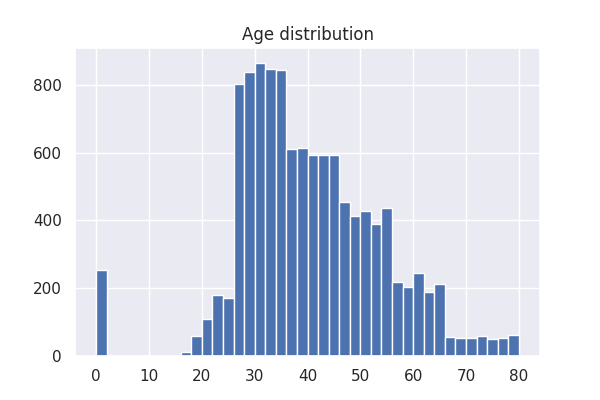

In [12]:
sns.set(style = "darkgrid")
plt.figure(figsize = (6, 4))
plt.hist(x = df['Age'], bins = 40)    #, bins = 'fd')
plt.title('Age distribution')
plt.show()

#### Basic Analysis 5 - Age Distribution of Policy Holders - Grouped By Fraud/Genuine

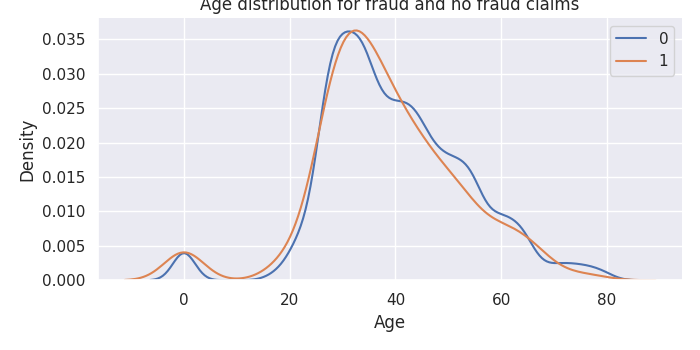

In [13]:
sns.set(style = "darkgrid")
g = sns.FacetGrid(df, hue='FraudFound_P', height = 3.5, aspect = 2)
g.map(sns.kdeplot, 'Age')
plt.title('Age distribution for fraud and no fraud claims')
plt.legend()
plt.show()

#### Basic Analysis 6 - ClaimSize Distribution of Policy Holders

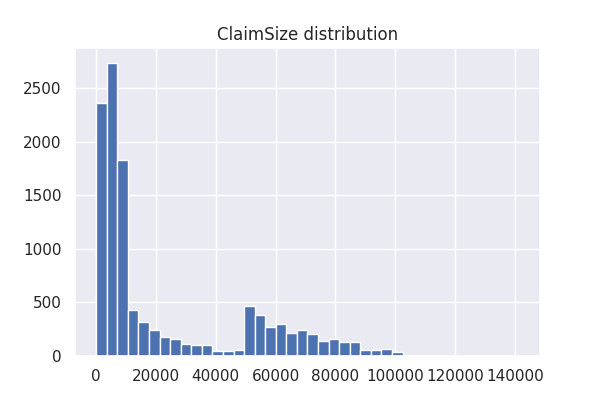

In [14]:
plt.figure(figsize = (6, 4))
sns.set(style = "darkgrid")
plt.hist(x = df['ClaimSize'], bins = 40)    #, bins = 'fd')
plt.title('ClaimSize distribution')
plt.show()

#### Basic Analysis 7 - ClaimSize Distribution of Policy Holders - Grouped By Fraud/Genuine

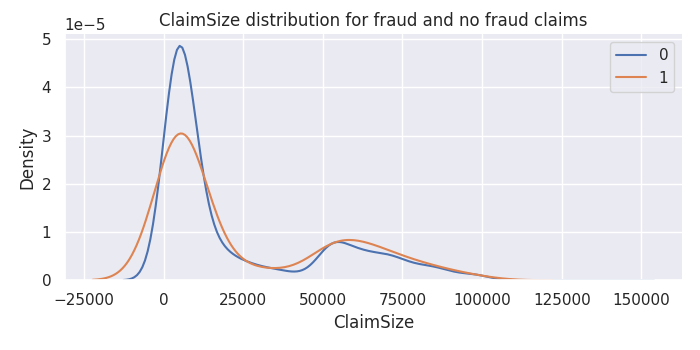

In [15]:
sns.set(style = "darkgrid")
g = sns.FacetGrid(df, hue='FraudFound_P', height = 3.5, aspect = 2)
g.map(sns.kdeplot, 'ClaimSize')
plt.title('ClaimSize distribution for fraud and no fraud claims')
plt.legend()
plt.show()

### The Features Columns Distributions View

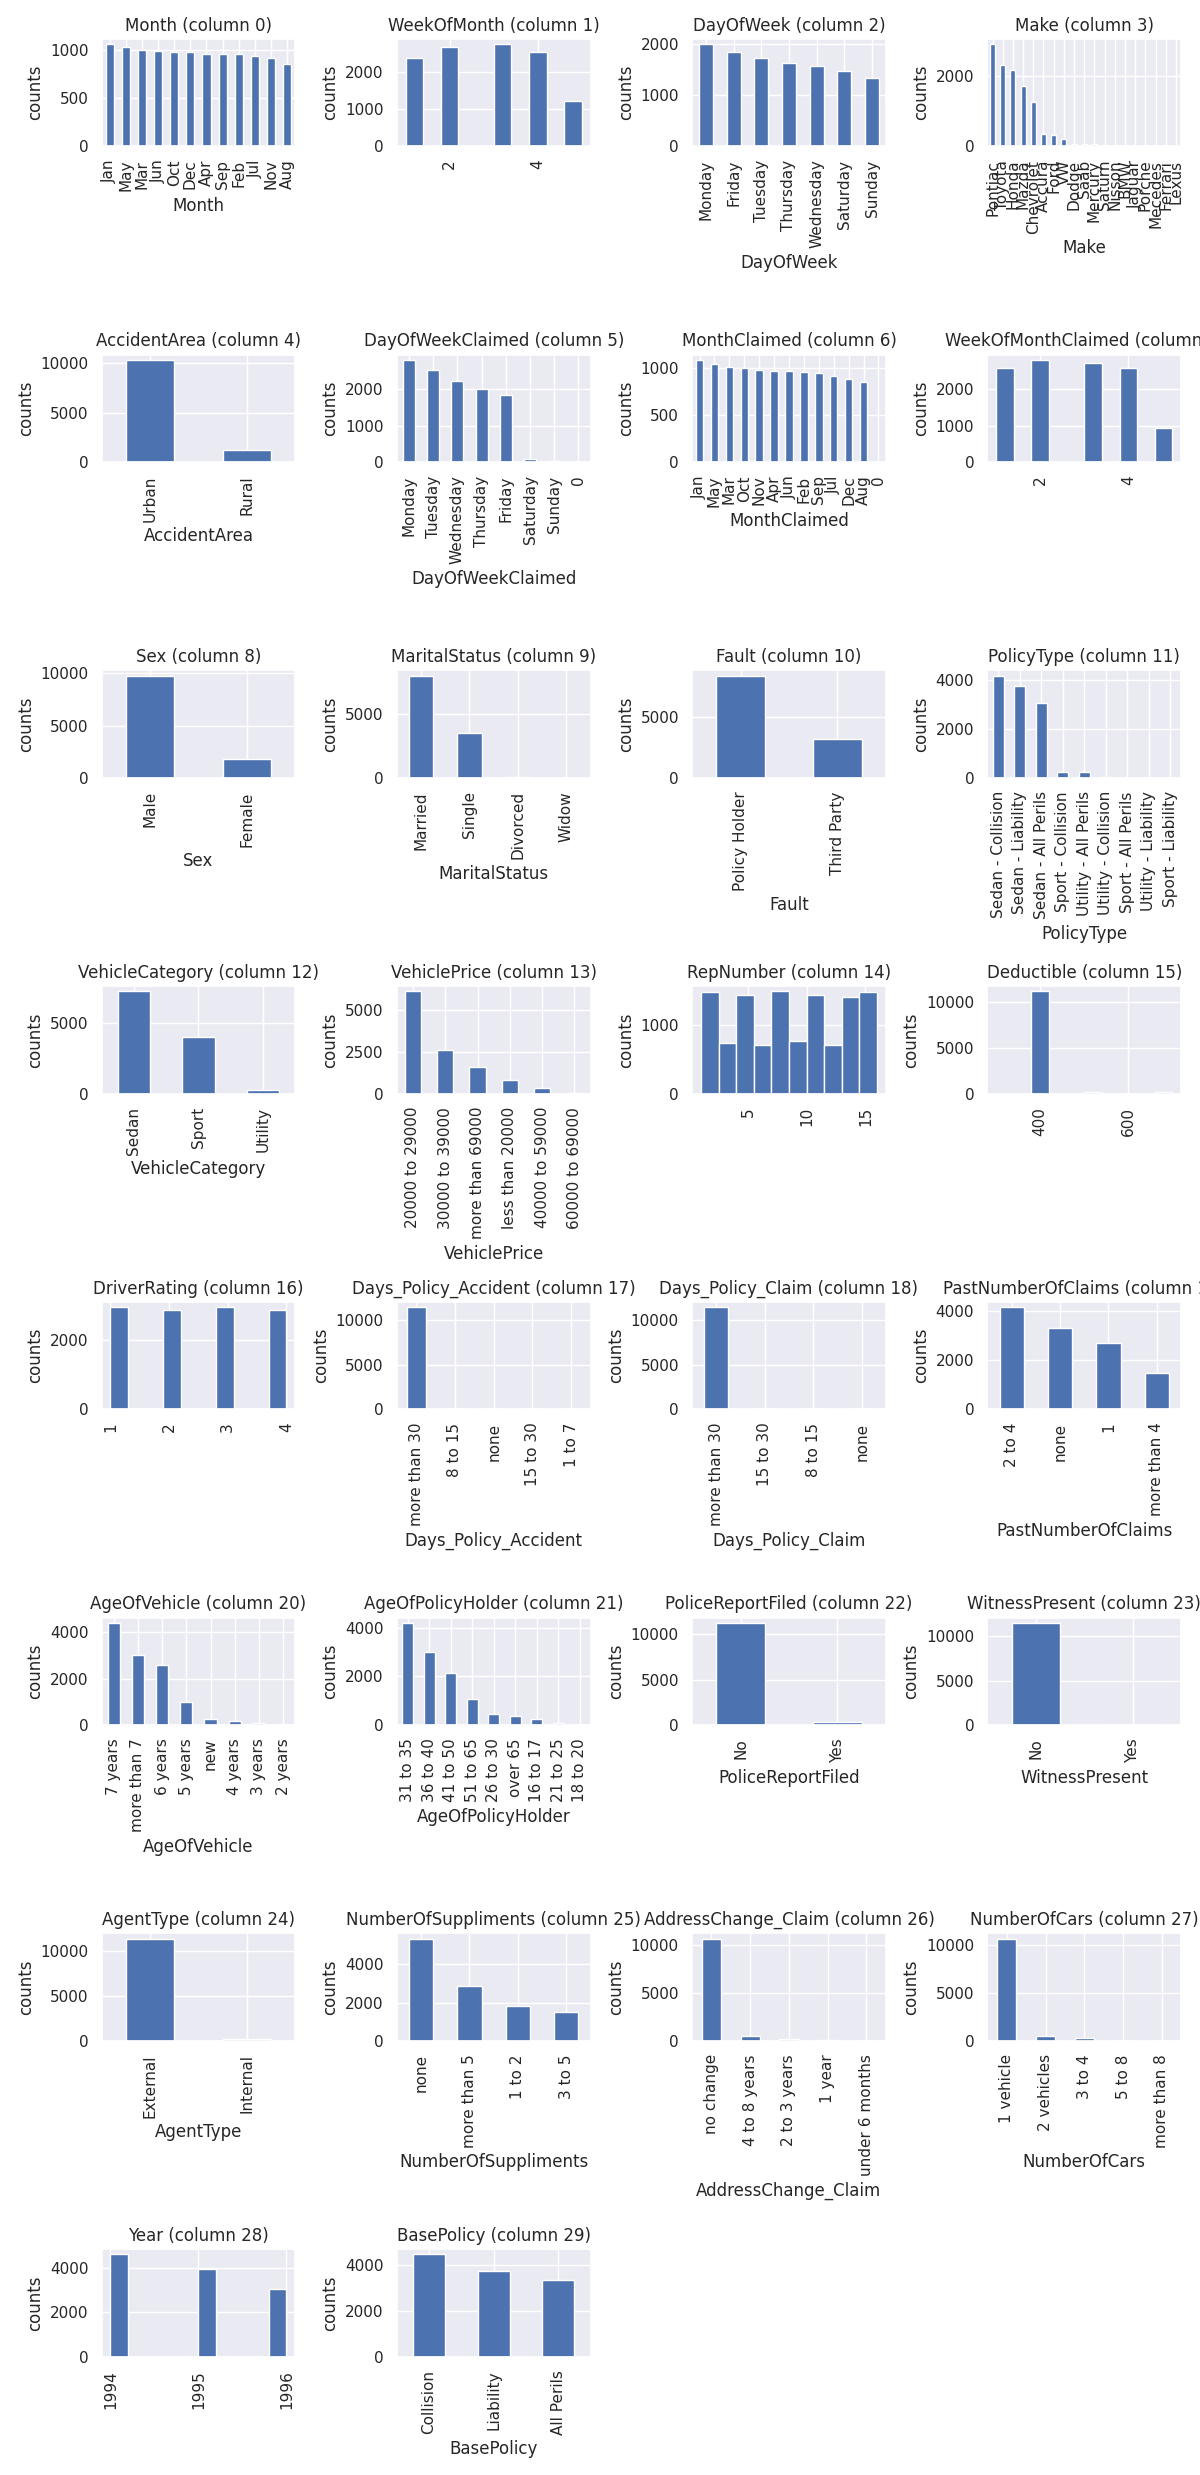

In [18]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    sub_graph_h = 3
    sub_graph_w = 3
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(figsize = (sub_graph_w*nGraphPerRow, sub_graph_h*nGraphRow))
    sns.set(style = "darkgrid")
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), int(nGraphPerRow), i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
    
plotPerColumnDistribution(df.drop('FraudFound_P', axis = 1), 33, 4)    

### Data preparation I - Encoding String Categorical Columns

In [19]:

df_encoded = df.copy()
df_encoded['Age'] = df_encoded['Age'].fillna(0)
df_encoded['DriverRating'] = df_encoded['DriverRating'].fillna(0)
df_encoded = df_encoded.dropna().reset_index(drop=True)
df_encoded.name = "Insurance Fraud Data"


label_encoder = preprocessing.LabelEncoder()

cols_to_encode = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'BasePolicy', \
                   'NumberOfCars', 'AddressChange_Claim', 'NumberOfSuppliments', 'WitnessPresent', 'PoliceReportFiled', \
                   'AgeOfPolicyHolder', 'AgeOfVehicle', 'Days_Policy_Claim', 'Days_Policy_Accident', 'PastNumberOfClaims', \
                   'Sex', 'MaritalStatus', 'AgentType', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice']

for col in cols_to_encode:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

In [20]:
print("number of columns =", len(df_encoded.columns))
print("number of feature columns =", len(df_encoded.columns)-1)
print("number of rows(data points) =", len(df_encoded.index))
df_encoded.describe()

number of columns = 34
number of feature columns = 33
number of rows(data points) = 11565


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
count,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.00000,11565.000000
mean,5.537916,2.784003,2.897103,10.097968,0.895460,4.219628,6.583744,2.701167,0.844617,1.300735,39.882317,0.274189,1.258798,0.397752,1.274535,0.059230,7710.474449,8.469780,407.617812,2.492175,2.991180,1.990834,1.463554,4.810981,4.898919,0.028534,0.005880,0.014786,2.010722,2.885863,0.103415,1994.865975,1.03623,22955.978035
std,3.419841,1.284854,2.048900,5.276479,0.305972,2.271028,3.422464,1.258153,0.362285,0.473808,13.612912,0.446124,1.185801,0.537937,1.829496,0.236066,4453.762219,4.618952,43.397393,1.119253,0.163492,0.131848,1.131217,1.129186,1.403991,0.166501,0.076457,0.120701,1.109169,0.454553,0.391707,0.801798,0.78234,26988.811719
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000,0.00000,0.000000
25%,3.000000,2.000000,1.000000,6.000000,1.000000,2.000000,4.000000,2.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3851.000000,4.000000,400.000000,1.000000,3.000000,2.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1994.000000,0.00000,4148.845001
50%,6.000000,3.000000,3.000000,9.000000,1.000000,5.000000,7.000000,3.000000,1.000000,1.000000,38.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7712.000000,8.000000,400.000000,2.000000,3.000000,2.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1995.000000,1.00000,8130.994563
75%,8.000000,4.000000,5.000000,13.000000,1.000000,6.000000,10.000000,4.000000,1.000000,2.000000,49.000000,1.000000,2.000000,1.000000,1.000000,0.000000,11542.000000,12.000000,400.000000,3.000000,3.000000,2.000000,3.000000,6.000000,6.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1996.000000,2.00000,46299.646944
max,11.000000,5.000000,6.000000,18.000000,1.000000,7.000000,12.000000,5.000000,1.000000,3.000000,80.000000,1.000000,8.000000,2.000000,5.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,4.000000,3.000000,3.000000,7.000000,8.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1996.000000,2.00000,141394.159289


In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  int64  
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  int64  
 3   Make                  11565 non-null  int64  
 4   AccidentArea          11565 non-null  int64  
 5   DayOfWeekClaimed      11565 non-null  int64  
 6   MonthClaimed          11565 non-null  int64  
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  int64  
 9   MaritalStatus         11565 non-null  int64  
 10  Age                   11565 non-null  float64
 11  Fault                 11565 non-null  int64  
 12  PolicyType            11565 non-null  int64  
 13  VehicleCategory       11565 non-null  int64  
 14  VehiclePrice          11565 non-null  int64  
 15  FraudFound_P       

### The Features Correlation Matrix

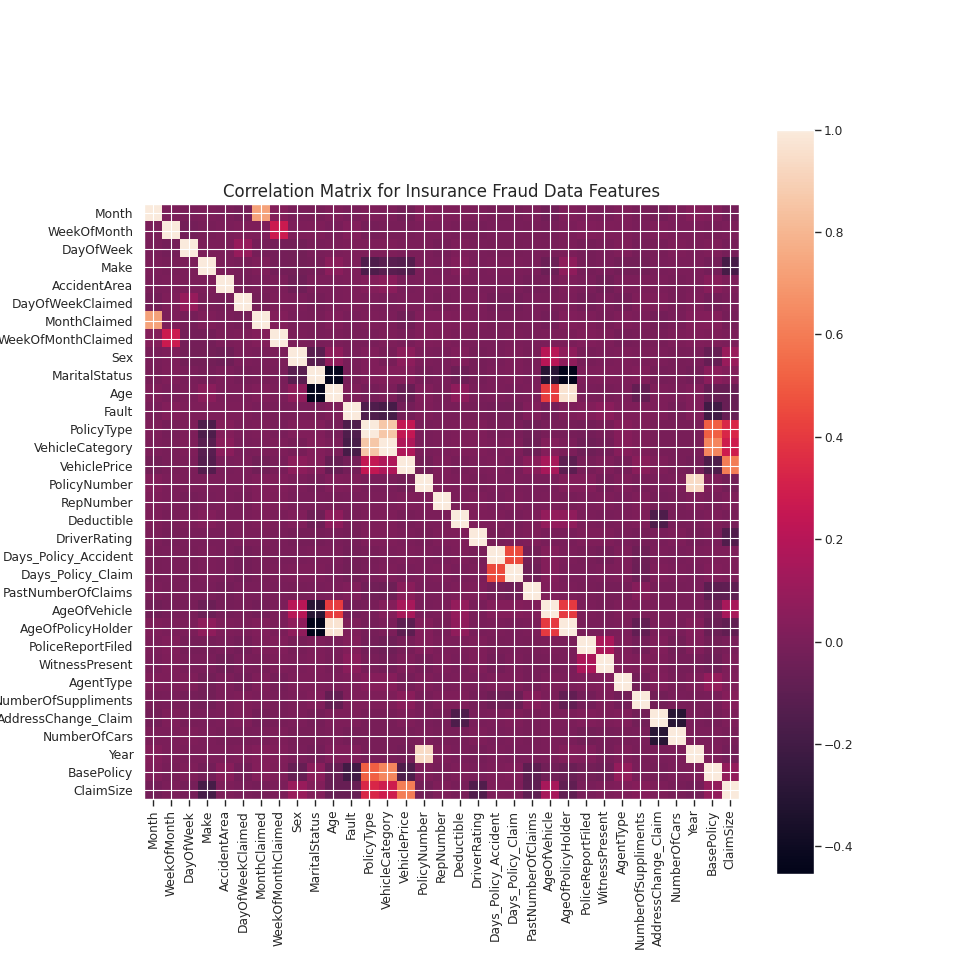

In [22]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth, filename):
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=plt.gcf().number)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

    
plotCorrelationMatrix(df_encoded.drop('FraudFound_P', axis = 1), 12, "Insurance Fraud Data Features")

### Data Preparation II - Scaling

In [24]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_encoded.drop('FraudFound_P', axis = 1))
y = df_encoded['FraudFound_P'].values

In [25]:
print('Shapes[dimensionality]: Scaled Features =', X.shape, 'Predictions = ', y.shape)

Shapes[dimensionality]: Scaled Features = (11565, 33) Predictions =  (11565,)


## Dimensionality reduction & View

### PCA View

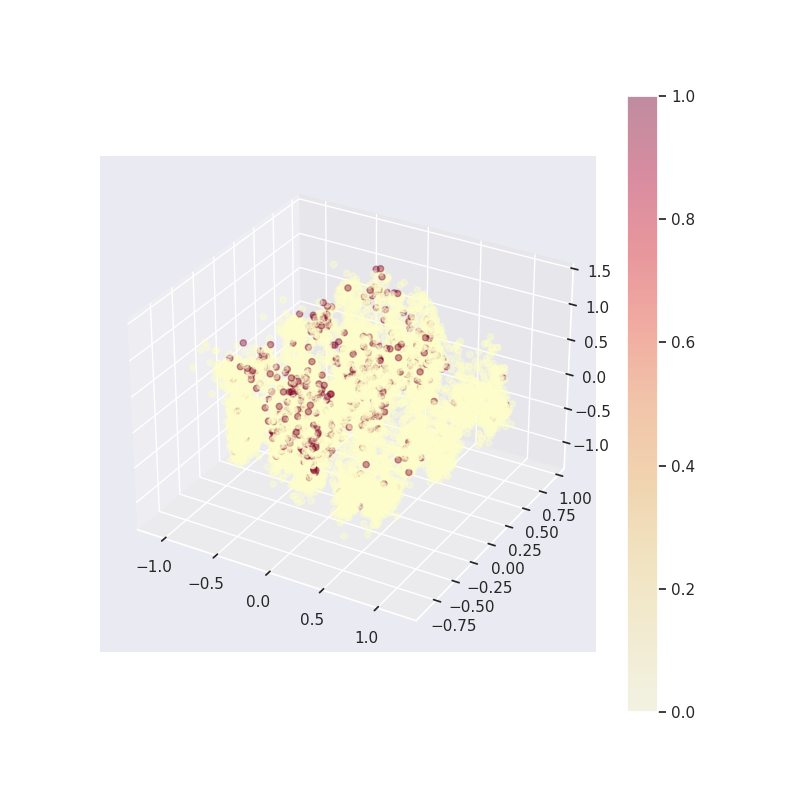

In [26]:
pca = PCA(n_components=3, random_state = 1)
df_pca = pca.fit_transform(X)

df_vis = pd.DataFrame(df_pca)
df_vis['y'] = y

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sns.set(style = "darkgrid")

xp = df_vis[0]
yp = df_vis[1]
zp = df_vis[2]

c= df_vis['y']
img = ax.scatter(xs=xp, ys=yp, zs=zp, c=y, cmap='YlOrRd', alpha=.4)
fig.colorbar(img)
plt.show()


### t-distributed Stochastic Neighbor Embedding - TSNE View

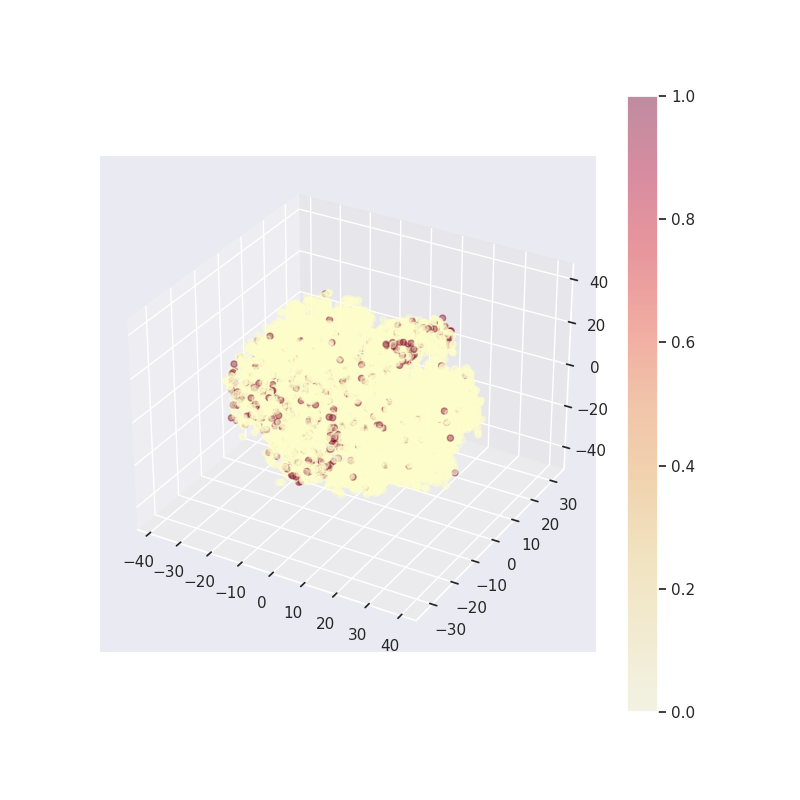

In [27]:
tsne = TSNE(
    n_components=3, 
    random_state = 1,
    n_jobs = -1,
    n_iter_without_progress=200
)

df_tsne = tsne.fit_transform(X)

df_vis = pd.DataFrame(df_tsne)
df_vis['y'] = y

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sns.set(style = "darkgrid")

xp = df_vis[0]
yp = df_vis[1]
zp = df_vis[2]

c= df_vis['y']
img = ax.scatter(xs=xp, ys=yp, zs=zp, c=y, cmap='YlOrRd', alpha=.4)
fig.colorbar(img)
plt.show()

### Uniform Manifold Approximation and Projection - UMAP View

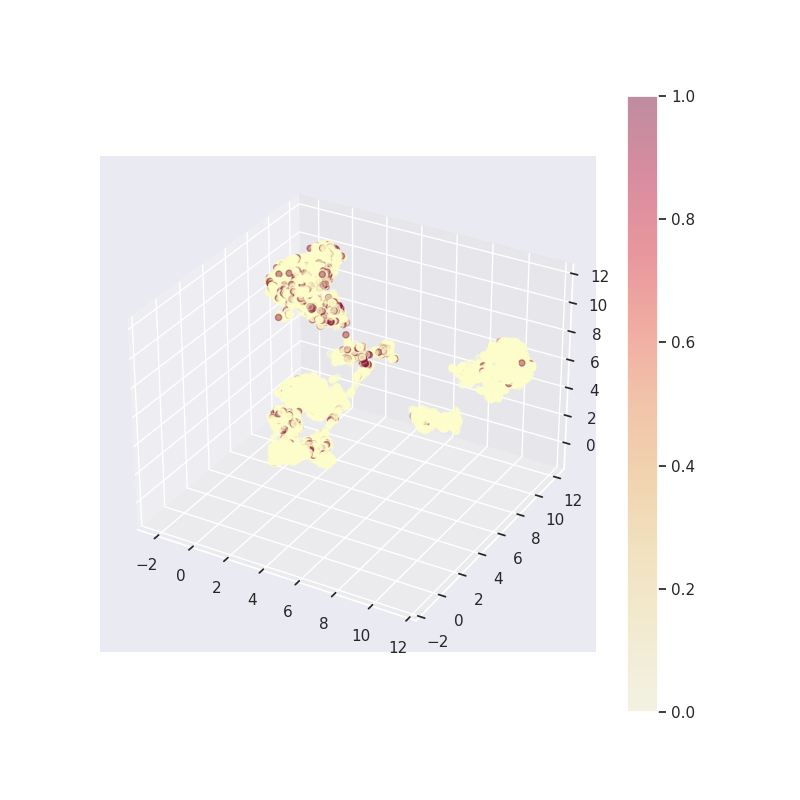

In [28]:
umap_m = umap.UMAP(
    n_components=3, 
    random_state=1, 
    n_neighbors=5
)

df_umap = umap_m.fit_transform(X)

df_vis = pd.DataFrame(df_umap)
df_vis['y'] = y

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sns.set(style = "darkgrid")

xp = df_vis[0]
yp = df_vis[1]
zp = df_vis[2]

c= df_vis['y']
img = ax.scatter(xs=xp, ys=yp, zs=zp, c=y, cmap='YlOrRd', alpha=.4)
fig.colorbar(img)
plt.show()

### Linear Discriminant Analysis - LDA 

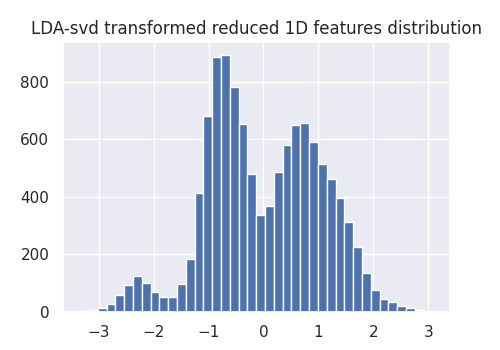

In [29]:
lda = LinearDiscriminantAnalysis(solver='svd')
svd_lda = lda.fit_transform(X, y)

plt.figure(figsize = (5, 3.5))
plt.hist(x = svd_lda, bins = 40)
plt.title('LDA-svd transformed reduced 1D features distribution')
plt.show()


Note: We see a twin peaked histogram corrosponding to two output classes.<br>
Or more intuitively two histograms overlapping with each other.<br>
Thus the classes are not readily seperable or the dataset is a 'hard' dataset for prediction purposes.

### PCA Revisited - Understanding feature Covariances and selecting the number of feature components

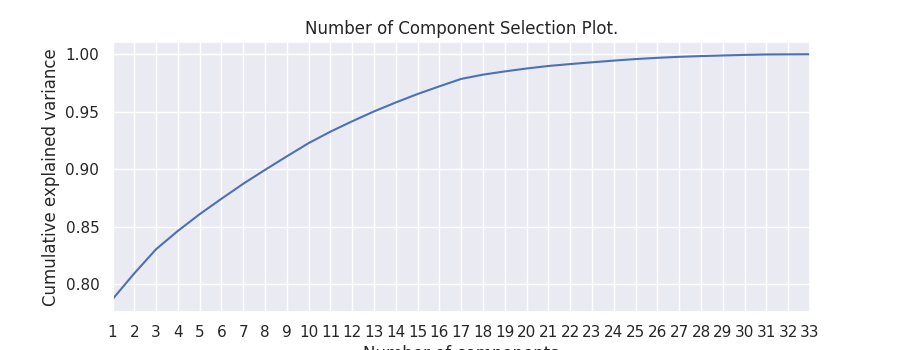

In [30]:
#PCA Understanding feature Covariances and selecting the number of feature components
cov = (X.T @ X) / (X.shape[0] - 1)
eig_values, eig_vectors = np.linalg.eig(cov)
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)

plt.figure(figsize = (9, 3.5))
sns.set(style = "darkgrid")
plt.plot(xint, cumsum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Number of Component Selection Plot.")
plt.xticks(xint)
plt.xlim(1, len(cumsum), 1)
plt.show()

We see that at about 17 components 98% of the covariance is explained.

## PART1: Machine Learning Models
Now we explore various Machine Learning models for best AUC scores on our data<br>
We perform hyperparameter tuning for 6 models and compare the rezults

#### Data Splitting - Test and Train Data

In [31]:
X_f = df_encoded.drop('FraudFound_P', axis = 1).values
y_f = df_encoded['FraudFound_P'].values

X_train, X_test, y_train, y_test = train_test_split(
                    X_f, y_f, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
dic_AUC ={}
dic_accuracy = {}
dic_param = {}
dic_report = {}

#### Random forest Booster Hyperparameter tuning

In [33]:
clf = RandomForestClassifier()
# Sequential search of parameters, using  fold cross validation, 
# search across different combinations, and use all available cores

nm = 'RandomF'
train_features = X_train
train_label = y_train

random_grid = {'n_estimators': [61, 100, 161, 262, 423],
               'max_depth': [5, 8, 13, 21, None],
               'bootstrap': [True, False]}

clf_CV = GridSearchCV(estimator = clf, param_grid = random_grid,
                               cv = 5, verbose=0, n_jobs = -1, scoring='roc_auc')
clf_CV.fit(train_features, train_label)

print('Grid best parameters (max. AUC): ')
pprint.pprint(clf_CV.best_params_)
print('Grid best score (AUC):', clf_CV.best_score_)

y_test_op = clf_CV.predict(X_test)

accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)
print("Report on test data for ", nm, '\n', rep)
print("Accuracy on test data for ", nm, ":", accr)

dic_AUC[nm]=clf_CV.best_score_
dic_accuracy[nm]=accr
dic_param[nm]= clf_CV.best_params_
dic_report[nm]=rep


Grid best parameters (max. AUC): 
{'bootstrap': False, 'max_depth': 21, 'n_estimators': 423}
Grid best score (AUC): 0.8511029989835356
Report on test data for  RandomF 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      2308
           1       0.04      1.00      0.07         5

    accuracy                           0.94      2313
   macro avg       0.52      0.97      0.52      2313
weighted avg       1.00      0.94      0.97      2313

Accuracy on test data for  RandomF : 0.9433635970600951


#### ADA Booster Hyperparameter tuning

In [34]:
clf = AdaBoostClassifier()
# Sequential search of parameters, using  fold cross validation, 
# search across different combinations, and use all available cores

nm = 'ADA-B'
train_features = X_train
train_label = y_train

random_grid = {'n_estimators': [2, 4, 6, 11, 18, 29],
    'learning_rate': [(x / 20) for x in range(1, 20)],
    'algorithm': ['SAMME', 'SAMME.R']}

clf_CV = GridSearchCV(estimator = clf, param_grid = random_grid,
                               cv = 5, verbose=0, n_jobs = -1, scoring='roc_auc')
clf_CV.fit(train_features, train_label)

print('Grid best parameters (max. AUC): ')
pprint.pprint(clf_CV.best_params_)
print('Grid best score (AUC):', clf_CV.best_score_)

y_test_op = clf_CV.predict(X_test)

accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)
print("Report on test data for ", nm, '\n', rep)
print("Accuracy on test data for ", nm, ":", accr)

dic_AUC[nm]=clf_CV.best_score_
dic_accuracy[nm]=accr
dic_param[nm]= clf_CV.best_params_
dic_report[nm]=rep

Grid best parameters (max. AUC): 
{'algorithm': 'SAMME.R', 'learning_rate': 0.35, 'n_estimators': 18}
Grid best score (AUC): 0.7918858119495698
Report on test data for  ADA-B 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      2313
           1       0.00      0.00      0.00         0

    accuracy                           0.94      2313
   macro avg       0.50      0.47      0.48      2313
weighted avg       1.00      0.94      0.97      2313

Accuracy on test data for  ADA-B : 0.9412019022913964


#### Gradient Boosting Classifier Hyperparameter Tuning

In [35]:
clf = GradientBoostingClassifier()
# Sequential search of parameters, using  fold cross validation, 
# search across different combinations, and use all available cores

nm = 'GB-Tree'
train_features = X_train
train_label = y_train

random_grid = {'n_estimators': [61, 100, 161, 262, 423, 684],
               'max_depth': [3, 5, 8, 13],
               'learning_rate': [(x / 200) for x in range(1, 200, 5)]
              }

clf_CV = GridSearchCV(estimator = clf, param_grid = random_grid,
                               cv = 5, verbose=0, n_jobs = -1, scoring='roc_auc')
clf_CV.fit(train_features, train_label)

print('Grid best parameters (max. AUC): ')
pprint.pprint(clf_CV.best_params_)
print('Grid best score (AUC):', clf_CV.best_score_)

y_test_op = clf_CV.predict(X_test)

accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)
print("Report on test data for ", nm, '\n', rep)
print("Accuracy on test data for ", nm, ":", accr)

dic_AUC[nm]=clf_CV.best_score_
dic_accuracy[nm]=accr
dic_param[nm]= clf_CV.best_params_
dic_report[nm]=rep

Grid best parameters (max. AUC): 
{'learning_rate': 0.38, 'max_depth': 5, 'n_estimators': 684}
Grid best score (AUC): 0.9384989063891476
Report on test data for  GB-Tree 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      2276
           1       0.20      0.73      0.31        37

    accuracy                           0.95      2313
   macro avg       0.60      0.84      0.64      2313
weighted avg       0.98      0.95      0.96      2313

Accuracy on test data for  GB-Tree : 0.9485516645049719


#### Histogram Baised Gradient Boosting Tree Classifier Hyperparameter tuning

In [36]:
clf = HistGradientBoostingClassifier()
# Sequential search of parameters, using  fold cross validation, 
# search across different combinations, and use all available cores

nm = 'HGB-Tree'
train_features = X_train
train_label = y_train

random_grid = {'max_depth': [3, 5, 8, 13, 18, 29],
               'learning_rate': [(x / 200) for x in range(1, 200, 5)]
              }

clf_CV = GridSearchCV(estimator = clf, param_grid = random_grid,
                               cv = 5, verbose=0, n_jobs = -1, scoring='roc_auc')
clf_CV.fit(train_features, train_label)

print('Grid best parameters (max. AUC): ')
pprint.pprint(clf_CV.best_params_)
print('Grid best score (AUC):', clf_CV.best_score_)

y_test_op = clf_CV.predict(X_test)

accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)
print("Report on test data for ", nm, '\n', rep)
print("Accuracy on test data for ", nm, ":", accr)

dic_AUC[nm]=clf_CV.best_score_
dic_accuracy[nm]=accr
dic_param[nm]= clf_CV.best_params_
dic_report[nm]=rep

Grid best parameters (max. AUC): 
{'learning_rate': 0.355, 'max_depth': 18}
Grid best score (AUC): 0.9405772579865331
Report on test data for  HGB-Tree 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      2261
           1       0.25      0.65      0.36        52

    accuracy                           0.95      2313
   macro avg       0.62      0.80      0.67      2313
weighted avg       0.98      0.95      0.96      2313

Accuracy on test data for  HGB-Tree : 0.9481193255512321


#### Extra Trees Classifier Hyperparameter Tuning

In [37]:
clf = ExtraTreesClassifier()
# Sequential search of parameters, using  fold cross validation, 
# search across different combinations, and use all available cores

nm = 'Ex-Tree'
train_features = X_train
train_label = y_train

random_grid = {'n_estimators': [100, 161, 262, 423, 684],
               'max_depth': [5, 8, 13, 21],
               'max_features': ['auto','sqrt','log2'],
              }

clf_CV = GridSearchCV(estimator = clf, param_grid = random_grid,
                               cv = 5, verbose=0, n_jobs = -1, scoring='roc_auc')
clf_CV.fit(train_features, train_label)

print('Grid best parameters (max. AUC): ')
pprint.pprint(clf_CV.best_params_)
print('Grid best score (AUC):', clf_CV.best_score_)

y_test_op = clf_CV.predict(X_test)

accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)
print("Report on test data for ", nm, '\n', rep)
print("Accuracy on test data for ", nm, ":", accr)

dic_AUC[nm]=clf_CV.best_score_
dic_accuracy[nm]=accr
dic_param[nm]= clf_CV.best_params_
dic_report[nm]=rep

Grid best parameters (max. AUC): 
{'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 423}
Grid best score (AUC): 0.8375795940693072
Report on test data for  Ex-Tree 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      2313
           1       0.00      0.00      0.00         0

    accuracy                           0.94      2313
   macro avg       0.50      0.47      0.48      2313
weighted avg       1.00      0.94      0.97      2313

Accuracy on test data for  Ex-Tree : 0.9412019022913964


#### XGboost Classifier Hyperparameter tuning

In [38]:
param_test0 = {
 'max_depth':[i for i in range(3, 24, 3)],
 'min_child_weight':[i for i in range(1,10)],
}

gsearch0 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch0.fit(X_train,y_train)
print(gsearch0.best_params_, gsearch0.best_score_)

{'max_depth': 12, 'min_child_weight': 2} 0.9313331129642176


In [39]:
#we fix the parameters max_depth=12 and min_child_weight=2

param_test1 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'n_estimators': [61, 100, 161, 262, 423],
 'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2, 0.33]
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=12,
 min_child_weight=2, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
_ = gsearch1.fit(X_train,y_train)

In [40]:
nm= 'XGBoost'

print('Grid best parameters (max. AUC): ')
pprint.pprint(gsearch1.best_params_)
print('Grid best score (AUC):', gsearch1.best_score_)

y_test_op = gsearch1.predict(X_test)

accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)
print("Report on test data for ", nm, '\n', rep)
print("Accuracy on test data for ", nm, ":", accr)

dic_AUC[nm]=clf_CV.best_score_
dic_accuracy[nm]=accr
dic_param[nm]= clf_CV.best_params_
dic_report[nm]=rep

Grid best parameters (max. AUC): 
{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'n_estimators': 423,
 'subsample': 0.9}
Grid best score (AUC): 0.9402183366442662
Report on test data for  XGBoost 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      2286
           1       0.16      0.81      0.27        27

    accuracy                           0.95      2313
   macro avg       0.58      0.88      0.62      2313
weighted avg       0.99      0.95      0.97      2313

Accuracy on test data for  XGBoost : 0.9485516645049719


####  A Side By Side Comparison of Various Classifiers on Predicting Insurance Fraud Data

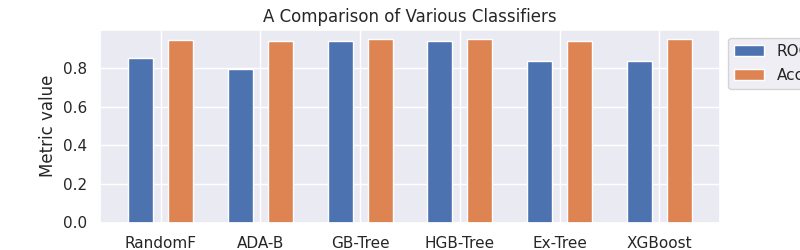

In [46]:
X = list(dic_AUC.keys())
Y = list(dic_AUC.values())
Z = list(dic_accuracy.values())

X_axis = np.arange(len(X))

plt.figure(figsize = (8, 2.5))
sns.set(style = "darkgrid")
plt.bar(X_axis - 0.2, Y, 0.25, label = 'ROC_AUC')
plt.bar(X_axis + 0.2, Z, 0.25, label = 'Accuracy')
  
plt.xticks(X_axis, X)
plt.xlabel("Classifier Type")
plt.ylabel("Metric value")
plt.title("A Comparison of Various Classifiers")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

### Iterations in Model Process - Apply PCA, TSNE, UMAP transforms and investigate model performance

In [48]:
#we assume 98% of data covariances to be contained in 17 components across all transfoms

MAX_COMPONENTS = 17

pca = PCA(n_components=MAX_COMPONENTS, random_state = 1)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

tsne = TSNE(
    n_components=MAX_COMPONENTS,
    random_state = 1,
    n_jobs = -1,
    n_iter_without_progress=200
)
X_tsne_train = pca.fit_transform(X_train)
X_tsne_test = pca.transform(X_test)


umap_m = umap.UMAP(
    n_components=MAX_COMPONENTS, 
    random_state=1, 
    n_neighbors=5
)
X_umap_train = umap_m.fit_transform(X_train)
X_umap_test = umap_m.transform(X_test)


#### XGboost Classifier Hyperparameter tuning - PCA transform

In [49]:
dic_AUC_t ={}
dic_accuracy_t={}
dic_AUC_t['XGboost'] = 0.9402183366442662
dic_accuracy_t['XGBoost'] = 0.9485516645049719

In [50]:
param_test0 = {
 'max_depth':[i for i in range(3, 24, 3)],
 'min_child_weight':[i for i in range(1,10)],
}

gsearch0 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch0.fit(X_pca_train,y_train)
print(gsearch0.best_params_, gsearch0.best_score_)

{'max_depth': 3, 'min_child_weight': 8} 0.7994370079306616


In [51]:
#we fix the parameters max_depth=3 and min_child_weight=8

param_test1 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'n_estimators': [61, 100, 161, 262, 423],
 'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2, 0.33]
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=8, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
_ = gsearch1.fit(X_pca_train,y_train)

In [52]:
nm= 'XGBoost_PCA'

print('Grid best parameters (max. AUC): ')
pprint.pprint(gsearch1.best_params_)
print('Grid best score (AUC):', gsearch1.best_score_)

y_test_op = gsearch1.predict(X_pca_test)

accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)
print("Report on test data for ", nm, '\n', rep)
print("Accuracy on test data for ", nm, ":", accr)

dic_AUC_t[nm]=gsearch1.best_score_
dic_accuracy_t[nm]=accr


Grid best parameters (max. AUC): 
{'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'n_estimators': 262,
 'subsample': 0.8}
Grid best score (AUC): 0.8034349775239304
Report on test data for  XGBoost_PCA 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      2312
           1       0.01      1.00      0.01         1

    accuracy                           0.94      2313
   macro avg       0.50      0.97      0.49      2313
weighted avg       1.00      0.94      0.97      2313

Accuracy on test data for  XGBoost_PCA : 0.9416342412451362


#### XGboost Classifier Hyperparameter tuning - TSNE transform

In [53]:
param_test0 = {
 'max_depth':[i for i in range(3, 24, 3)],
 'min_child_weight':[i for i in range(1,10)],
}

gsearch0 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch0.fit(X_tsne_train,y_train)
print(gsearch0.best_params_, gsearch0.best_score_)

{'max_depth': 3, 'min_child_weight': 8} 0.7994370079306616


In [54]:
#we fix the parameters max_depth=3 and min_child_weight=8

param_test1 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'n_estimators': [61, 100, 161, 262, 423],
 'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2, 0.33]
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=8, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
_ = gsearch1.fit(X_tsne_train,y_train)

In [55]:
nm= 'XGBoost_TSNE'

print('Grid best parameters (max. AUC): ')
pprint.pprint(gsearch1.best_params_)
print('Grid best score (AUC):', gsearch1.best_score_)

y_test_op = gsearch1.predict(X_tsne_test)

accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)
print("Report on test data for ", nm, '\n', rep)
print("Accuracy on test data for ", nm, ":", accr)

dic_AUC_t[nm]=gsearch1.best_score_
dic_accuracy_t[nm]=accr


Grid best parameters (max. AUC): 
{'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'n_estimators': 262,
 'subsample': 0.8}
Grid best score (AUC): 0.8034349775239304
Report on test data for  XGBoost_TSNE 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      2312
           1       0.01      1.00      0.01         1

    accuracy                           0.94      2313
   macro avg       0.50      0.97      0.49      2313
weighted avg       1.00      0.94      0.97      2313

Accuracy on test data for  XGBoost_TSNE : 0.9416342412451362


#### XGboost Classifier Hyperparameter tuning - UMAP transform

In [56]:
param_test0 = {
 'max_depth':[i for i in range(3, 24, 3)],
 'min_child_weight':[i for i in range(1,10)],
}

gsearch0 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch0.fit(X_umap_train,y_train)
print(gsearch0.best_params_, gsearch0.best_score_)

{'max_depth': 3, 'min_child_weight': 5} 0.7709020670860942


In [57]:
#we fix the parameters max_depth=3 and min_child_weight=5

param_test1 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'n_estimators': [61, 100, 161, 262, 423],
 'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2, 0.33]
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
_ = gsearch1.fit(X_umap_train,y_train)

In [58]:
nm= 'XGBoost_UMAP'

print('Grid best parameters (max. AUC): ')
pprint.pprint(gsearch1.best_params_)
print('Grid best score (AUC):', gsearch1.best_score_)

y_test_op = gsearch1.predict(X_umap_test)

accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)
print("Report on test data for ", nm, '\n', rep)
print("Accuracy on test data for ", nm, ":", accr)

dic_AUC_t[nm]=gsearch1.best_score_
dic_accuracy_t[nm]=accr


Grid best parameters (max. AUC): 
{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'n_estimators': 61,
 'subsample': 0.9}
Grid best score (AUC): 0.7741652191112206
Report on test data for  XGBoost_UMAP 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      2313
           1       0.00      0.00      0.00         0

    accuracy                           0.94      2313
   macro avg       0.50      0.47      0.48      2313
weighted avg       1.00      0.94      0.97      2313

Accuracy on test data for  XGBoost_UMAP : 0.9412019022913964


####  A Side By Side Comparison of Effects of Various Dimensionality Reducing Transforms on Predicting Insurance Fraud Data

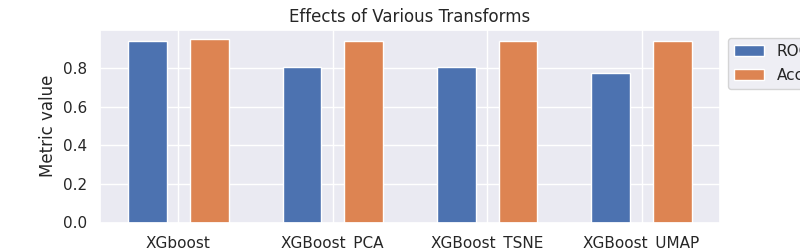

In [59]:
X = list(dic_AUC_t.keys())
Y = list(dic_AUC_t.values())
Z = list(dic_accuracy_t.values())

X_axis = np.arange(len(X))

plt.figure(figsize = (8, 2.5))
sns.set(style = "darkgrid")
plt.bar(X_axis - 0.2, Y, 0.25, label = 'ROC_AUC')
plt.bar(X_axis + 0.2, Z, 0.25, label = 'Accuracy')
  
plt.xticks(X_axis, X)
plt.xlabel("Classifier Type")
plt.ylabel("Metric value")
plt.title("Effects of Various Transforms")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

#### Conclusion On Dimensionality Reduction Transforms

On applying various dimensionality reduction techniques we do not see an increase in overall accuracy or AUC score.<br>
On the contrary both the accuracy and AUC scores decrease slightly on application of the dimensionality reduction transforms.<br>
Thus we can conclude that dimensionality reduction transforms are not appplicable or required for processing this dataset.

## PART2: Deep Learning Models

#### Basic Sequential Model

In [60]:
# Build the Sequential feedforward neural network model
model = Sequential([
                   Dense(64, activation ='relu', input_shape=(33,)),
                   BatchNormalization(synchronized=True),
                   Dropout(0.6),
                   Dense(128, activation ='relu'),
                   BatchNormalization(synchronized=True),    
                   Dropout(0.6),
                   Dense(64, activation ='relu'),
                   BatchNormalization(synchronized=True),    
                   Dropout(0.6),
                   Dense(1, activation ='sigmoid'),
                  ])


opt=tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.BinaryAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
               loss='binary_crossentropy',
               metrics=[acc, mae])

history = model.fit(x=X_train[...,np.newaxis], y=y_train, validation_data=(X_test[..., np.newaxis], y_test),
                    epochs=20, batch_size=256, verbose=0)

# Load the history into a pandas Dataframe
df_hist = pd.DataFrame(history.history)
df_hist.head(20)


,loss,binary_accuracy,mean_absolute_error,val_loss,val_binary_accuracy,val_mean_absolute_error
0,0.662322,0.681366,0.400036,0.353635,0.941202,0.281239
1,0.335547,0.895266,0.227080,0.226724,0.941202,0.139597
2,0.250075,0.932123,0.137556,0.214738,0.941202,0.115409
3,0.230786,0.937851,0.123084,0.209839,0.941202,0.119022
4,0.220302,0.939797,0.116227,0.201303,0.941202,0.107758
5,0.214795,0.939797,0.116090,0.199163,0.941202,0.107460
6,0.208603,0.940661,0.114077,0.194152,0.941202,0.100778
7,0.205760,0.940553,0.112408,0.190411,0.941202,0.098667
8,0.205730,0.940770,0.111207,0.189325,0.941202,0.094138
9,0.200604,0.940661,0.109630,0.186003,0.941202,0.097362


In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

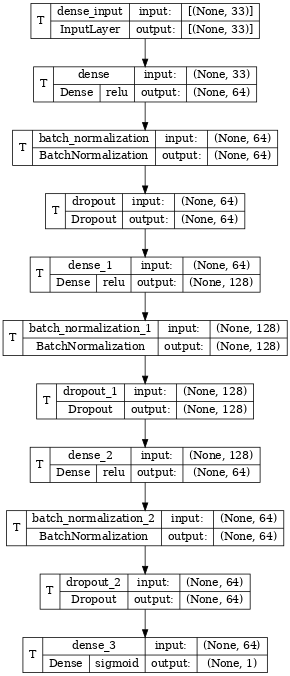

In [63]:
tf.keras.utils.plot_model(model, dpi=55, show_layer_activations=True,show_trainable=True,
                          show_shapes=True, show_dtype=False, show_layer_names=True, rankdir='TB',
                          expand_nested=True)

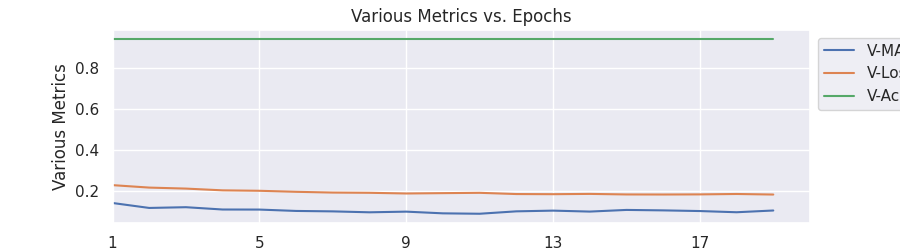

In [65]:
plt.figure(figsize = (9, 2.5))
sns.set(style = "darkgrid")

plt.xlabel("Epochs")
plt.ylabel("Various Metrics")
plt.title("Various Metrics vs. Epochs")
plt.plot(df_hist.index, df_hist['val_mean_absolute_error'], label = "V-MAE")
plt.plot(df_hist.index, df_hist['val_loss'], label = "V-Loss")
plt.plot(df_hist.index, df_hist['val_binary_accuracy'], label = "V-Accuracy")

plt.xticks(np.arange(1, 100, step=4))
plt.xlim(left=1, right=len(df_hist.index))
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

### Experimetal Model With Three Chained Resnet Blocks Adapted For Classification

In [66]:
ip = keras.Input(shape=(33,))

D0 = Dense(128, activation =None)(ip)
B0 = BatchNormalization(synchronized=True)(D0)
DP0 = Dropout(0.6)(B0)

### Resnet Block 1 - Begin
D1 = Dense(128, activation =None)(DP0)
A1 = tf.nn.relu(D1)
B1 = BatchNormalization(synchronized=True)(A1)
DP1 = Dropout(0.6)(B1)

D1a = Dense(128, activation =None)(DP1)
DP1a = Dropout(0.6)(D1a)
S1a = tf.add(DP0, DP1a)
B1 = BatchNormalization(synchronized=True)(S1a)
A1a = tf.nn.relu(B1)
DP1_op = Dropout(0.6)(A1a)
### Resnet Block 1 - End

### Resnet Block 2 - Begin
D2 = Dense(128, activation =None)(DP1_op)
S2a = tf.add(DP1, D2)
B2a = BatchNormalization(synchronized=True)(S2a)
A2 = tf.nn.relu(B2a)
DP2 = Dropout(0.6)(A2)

D2a = Dense(128, activation =None)(DP2)
DP2a = Dropout(0.6)(D2a)
S2b = tf.add(DP1_op, DP2a)
B2 = BatchNormalization(synchronized=True)(S2b)
A2a = tf.nn.tanh(B2)
DP2_op = Dropout(0.6)(A2a)
### Resnet Block 2 - End

op = Dense(1, activation ='sigmoid')(DP2_op)
                  
# Build the Sequential feedforward neural network model
model_r = keras.Model(inputs=ip, outputs=op, name="Resnet-1")

In [67]:
model_r.summary()

Model: "Resnet-1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 33)]                 0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 128)                  4352      ['input_1[0][0]']             
                                                                                                  
 batch_normalization_3 (Bat  (None, 128)                  512       ['dense_4[0][0]']             
 chNormalization)                                                                                 
                                                                                                  
 dropout_3 (Dropout)         (None, 128)                  0         ['batch_normalization_3

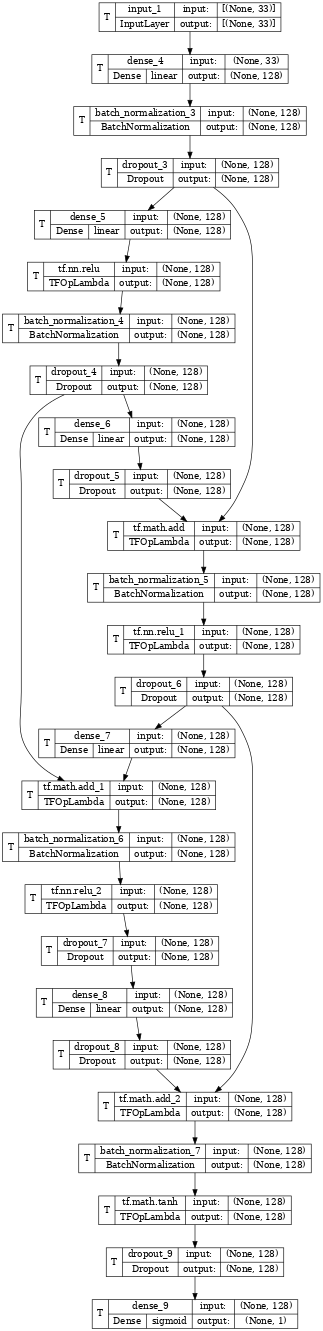

In [68]:
tf.keras.utils.plot_model(model_r, dpi=45, show_layer_activations=True,show_trainable=True,
                          show_shapes=True, show_dtype=False, show_layer_names=True, rankdir='TB',
                          expand_nested=True)

In [69]:
opt=tf.keras.optimizers.Adam(learning_rate=0.002)
acc=tf.keras.metrics.BinaryAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model_r.compile(optimizer=opt,
               loss='binary_crossentropy',
               metrics=[acc, mae])

history = model_r.fit(x=X_train[...,np.newaxis], y=y_train, validation_data=(X_test[..., np.newaxis], y_test),
                    epochs=7, batch_size=256, verbose=0)

# Load the history into a pandas Dataframe
df_hist = pd.DataFrame(history.history)
df_hist.head(10)


,loss,binary_accuracy,mean_absolute_error,val_loss,val_binary_accuracy,val_mean_absolute_error
0,0.456535,0.798206,0.295221,0.273023,0.941202,0.204005
1,0.308493,0.897752,0.180151,0.249665,0.941202,0.073312
2,0.282328,0.917423,0.151298,0.297018,0.941202,0.064093
3,0.253566,0.924449,0.136606,0.316659,0.941202,0.062197
4,0.252521,0.928664,0.131281,0.310737,0.941202,0.062236
5,0.245478,0.930393,0.126336,0.295288,0.941202,0.062948
6,0.236660,0.931042,0.126418,0.278236,0.941202,0.063989


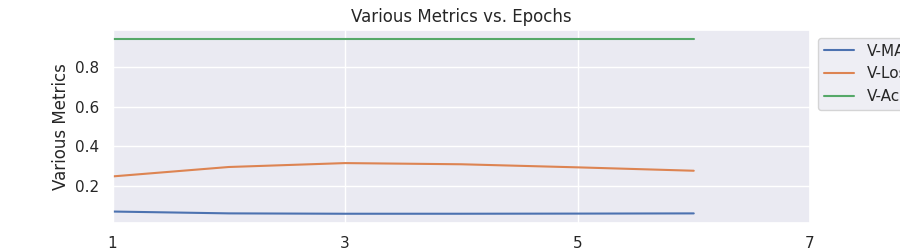

In [70]:
plt.figure(figsize = (9, 2.5))
sns.set(style = "darkgrid")

plt.xlabel("Epochs")
plt.ylabel("Various Metrics")
plt.title("Various Metrics vs. Epochs")
plt.plot(df_hist.index, df_hist['val_mean_absolute_error'], label = "V-MAE")
plt.plot(df_hist.index, df_hist['val_loss'], label = "V-Loss")
plt.plot(df_hist.index, df_hist['val_binary_accuracy'], label = "V-Accuracy")

plt.xticks(np.arange(1, 100, step=2))
plt.xlim(left=1, right=len(df_hist.index))
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

### Conclusion - Deep learning

We see that both the deep learning models perform equally well as the ML models, with both the normal sequencial model <br>
and the experimental resnet model having accuracy of 0.9412 which is only is 0.77% lesser then the ML models. 

## Model Selection - Machine Learning

In our project we select one of the ML models as machine learning algorithms are generally used for smaller datasets <br>
and our datasize is rather small (2.0 Mb). But in the above deep learning models section in this notebook, it is well<br>
demonstrated that deep learning models can also give equally good if not better rezults, perhaps as the training dataset <br>
grows larger in size, we might consider switching to deep learning models for better performance and accuracy.<br>

We see from the above set of hyper-parameter tuned ML models, the best ML models are:<br>
* Gradient Boosting Classifier                        {AUC: 0.94062, Accuracy: 0.94941}
* Histogram Baised Gradient Boosting Tree Classifier  {AUC: 0.94057, Accuracy: 0.94811}
* XGboost Classifier                                  {AUC: 0.94021, Accuracy: 0.94855}

We select XGboost, as it is more regularized, more scalable (supports spark and big data) <br>
and is much more streamlined to use CPU and memory resources efficiently. This makes it the <br>
ideal choice for a production environment.  

### Selected Model's Metrics- Accuracy, Precision, Recall, F1-Score, AUC & ROC and Confusion Matrix

In [71]:

model_op = xgb.XGBClassifier( learning_rate =0.1, n_estimators=423, max_depth=12,
 min_child_weight=2, gamma=0.3, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27)

model_op.fit(X_train, y_train)

y_test_op = model_op.predict(X_test)

accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)
print("Report on test data for XGBoost Output model", '\n', rep)
print("Accuracy on test data for XGBoost Output model", ":", accr)

Report on test data for XGBoost Output model 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      2286
           1       0.16      0.81      0.27        27

    accuracy                           0.95      2313
   macro avg       0.58      0.88      0.62      2313
weighted avg       0.99      0.95      0.97      2313

Accuracy on test data for XGBoost Output model : 0.9485516645049719


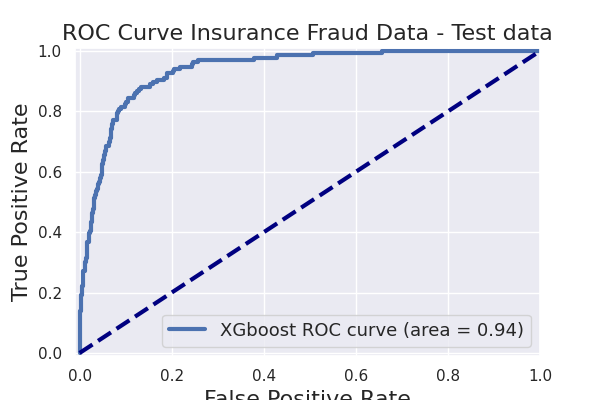

In [72]:
y_score = model_op.predict_proba(X_test)[:,1]
fpr_GBC, tpr_GBC, _ = roc_curve(y_test, y_score)
roc_auc_GBC = auc(fpr_GBC, tpr_GBC)

plt.figure(figsize=(6, 4))
sns.set(style = "darkgrid")
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_GBC, tpr_GBC, lw=3, label='XGboost ROC curve (area = {:0.2f})'.format(roc_auc_GBC))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve Insurance Fraud Data - Test data', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

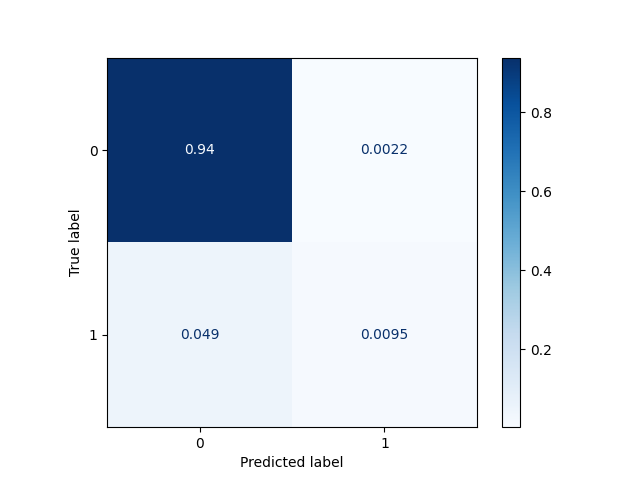

In [75]:
sns.reset_orig()
plt.grid(False)
cm = confusion_matrix(y_test, y_test_op, labels=model_op.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_op.classes_, )
disp.plot(cmap=plt.cm.Blues)
plt.show()

### A Statistical Analysis of Our Final Model.

Now we present the 95% confidence interval of accuracy of our XGboost Classifier output model Accuracy = (0.94649, 0.95060)$^*$.<br>
This means that with 95% confidence, the proportion of accurate predictions
from our model is estimated to be between 94.649% - 95.060%.


This is calculated using the standard formulae: $CI = \hat{p} \pm  z \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$
here $z = 1.96$ is the statistical ratio from the normal distribution for the 95% confidence level,<br>
$\hat{p}$ is the base proportion and $n$ is the sample size.<br>
<br>
$^*$ <sub><sup>Subject to the condition that the Central Limit Theorem of Statistics holds for the predictions from our model.<br>
               And the data fed to this model for analysis come from the same source which generated the training data,<br>
               collecting data under same/similar conditions as that of the training data collection conditions.<br></sub></sup>



## Data Product - Final Deliverable

### Generate Data Product

Run the Following cell to create the data product, it is a fully trained ML Pipeline designed to be directly used in production senarios,<br>
we just have to feed it with data and it will output the predictions.

In [76]:
df = pd.read_excel('./Dataset.xlsx', 
                   sheet_name = 'Sheet1')

#basic dropna and imputing transformer for pipeline
def preprocess_impute_dropna(X, y=None):
    df = pd.DataFrame(X)
    df['Age'] = df['Age'].fillna(0)
    df['DriverRating'] = df['DriverRating'].fillna(0)
    df.dropna(inplace=True)
    df.reset_index(inplace=True)
    
    return df

preprocess_impute_dropna_tr = FunctionTransformer(preprocess_impute_dropna, validate=False)

#string columns to integer labels transformer for pipeline
class preprocess_encode(BaseEstimator, TransformerMixin):
    def __init__(self):
        
        self.cols_to_encode = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'BasePolicy', \
                   'NumberOfCars', 'AddressChange_Claim', 'NumberOfSuppliments', 'WitnessPresent', 'PoliceReportFiled', \
                   'AgeOfPolicyHolder', 'AgeOfVehicle', 'Days_Policy_Claim', 'Days_Policy_Accident', 'PastNumberOfClaims', \
                   'Sex', 'MaritalStatus', 'AgentType', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice']

        self.label_encoders={}
        for i in self.cols_to_encode:
            self.label_encoders[i]=preprocessing.LabelEncoder()
        return
     
    def transform(self, dataset):
        for col in self.cols_to_encode:
            dataset[col] = self.label_encoders[col].transform(dataset[col].astype(str))
        return dataset.values              # make sure to return values instead of DataFrame
    
    def fit(self, dataset, y=None):
        for col in self.cols_to_encode:
            self.label_encoders[col].fit(dataset[col].astype(str))
        return self

preprocess_encoder_tr = preprocess_encode()

#MinMax scaler transformer for pipeline
scaler_tr = MinMaxScaler()

#Hyperparameters tuned XGB Classifier model for pipeline
XGB_classifier_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=423, max_depth=12,
 min_child_weight=2, gamma=0.3, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27)

#make the ML pipeline object
Pipe_op = make_pipeline(preprocess_impute_dropna_tr, preprocess_encoder_tr, scaler_tr, XGB_classifier_model)

#Fit the pipeline object with the full dataset at hand, for training.
Pipe_op.fit(df.drop('FraudFound_P', axis = 1), df['FraudFound_P'])

#Sanity check on the same training data, for pipeline structure and performance validity.
Y_pred = Pipe_op.predict(df.drop('FraudFound_P', axis = 1))
print('Sanity Check, accuracy(should be roughly near 1.0):', accuracy_score(Y_pred, df['FraudFound_P'].values))

# Use pickle to save model for next usage.
filename = 'XGB_Classifier_model_v1_insurance_data.pk'
with open('./'+filename, 'wb') as file:
    pickle.dump(Pipe_op, file) 

print("ML pipeline saved to pickle file XGB_Classifier_model_v1_insurance_data.pk")

Sanity Check, accuracy(should be roughly near 1.0): 1.0
ML pipeline saved to pickle file XGB_Classifier_model_v1_insurance_data.pk


### Data Product Usage

In [44]:
#Data Product Usage  
#1). read an excel file containing data (this must be in the same format
#    of the training dataset but WITHOUT THE TARGET PREDICTION COLUMN)
#2). read the saved pipeline from disk
#3). predict insurance fraud with ML pipeline
#4). remove the # from the lines given below to use the code

#df_in = pd.read_excel('./Dataset_in.xlsx', sheet_name = 'Sheet1')
#filename = 'XGB_Classifier_model_v1_insurance_data.pk'

#with open('./'+filename ,'rb') as f:
#   XGB_Classifier_insurance_data_model_v1 = pickle.load(f)

#fraud_prediction = XGB_Classifier_insurance_data_model_v1.predict(df_in)
